In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

In [5]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income',
       'Spending Score']

In [7]:
import seaborn as sns

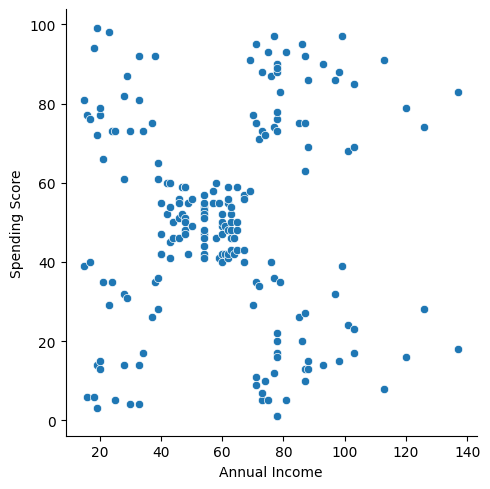

In [8]:
sns.relplot(x='Annual Income',y='Spending Score',data=df)

In [11]:
df = df.drop('CustomerID',axis='columns')
df.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [14]:
df.head(10)

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


In [16]:
df.dtypes

Gender            int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object

In [17]:
x = df

In [18]:
from sklearn.preprocessing import StandardScaler

In [23]:
# average = 0
# standard deviation = 1
st_obj = StandardScaler()


In [24]:
x_scaled = st_obj.fit_transform(x)

In [25]:
x_scaled

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

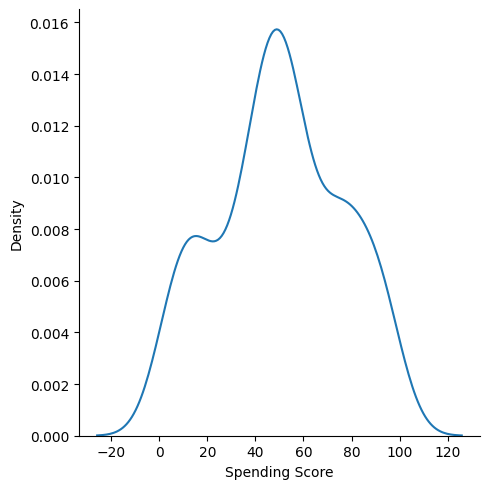

In [33]:
sns.displot(x['Spending Score'],kind='kde')


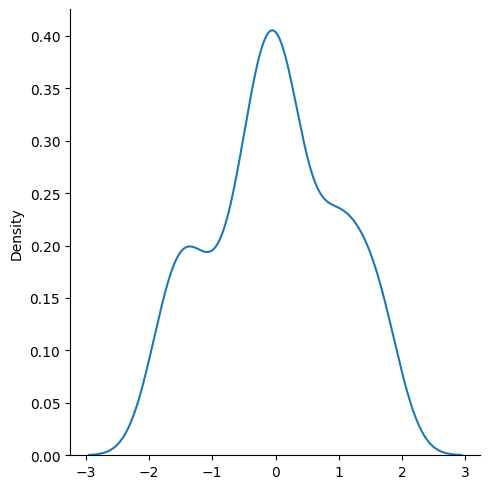

In [38]:
sns.displot(x_scaled[:,-1],kind='kde')

In [40]:
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering

In [41]:
kmean = KMeans()

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
y = kmean.fit_predict(x_scaled)

In [46]:
x_scaled.shape , y.shape

((200, 4), (200,))

In [52]:
kmean.inertia_

206.16229251360687

In [50]:
print(KMeans.__doc__)

K-Means clustering.

    Read more in the :ref:`User Guide <k_means>`.

    Parameters
    ----------

    n_clusters : int, default=8
        The number of clusters to form as well as the number of
        centroids to generate.

    init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
        Method for initialization:

        * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall inertia. This technique speeds up             convergence. The algorithm implemented is "greedy k-means++". It             differs from the vanilla k-means++ by making several trials at             each sampling step and choosing the best centroid among them.

        * 'random': choose `n_clusters` observations (rows) at random from         data for the initial centroids.

        * If an array is passed, it should 

In [63]:
def wcss(algo,data,max_range):
    wcss_temp = []
    for i  in range(2,max_range):
        obj_kmeans = algo(n_clusters=i)
        obj_kmeans.fit_predict(data)
        wcss = obj_kmeans.inertia_
        wcss_temp.append(wcss)
    return wcss_temp



In [64]:
wcss_temp  = wcss(KMeans,x_scaled,41)

In [57]:
from sklearn.metrics import silhouette_score

In [59]:
silhouette_score(x_scaled,y)

0.3691180609148692

In [66]:
import matplotlib.pyplot as plt 

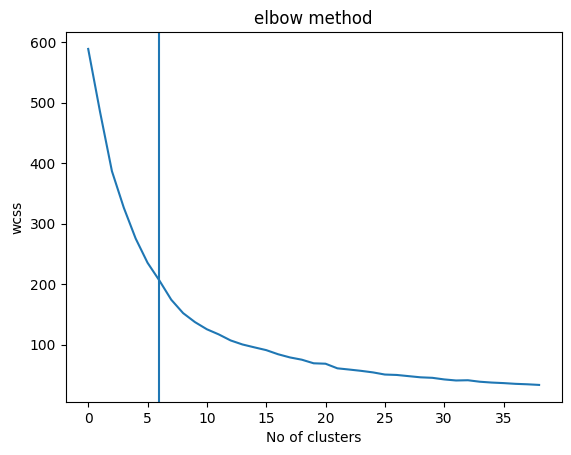

NameError: name 'autocall' is not defined

In [72]:
plt.plot(wcss_temp)
plt.title('elbow method')
plt.xlabel('No of clusters')
plt.axvline(6)
plt.ylabel('wcss')
plt.show()%autocall